# 🌊 River Land Cover Analysis - EuroSAT Multispectral Dataset

## Overview
This notebook provides comprehensive analysis of River class satellite imagery from the EuroSAT multispectral dataset. We'll explore spectral signatures, vegetation indices, and river characteristics using Sentinel-2 data.

## What You'll Learn:
- ✅ Dataset validation and structure exploration
- ✅ Dataset balancing to a uniform size (if needed)
- 📊 Multispectral band analysis and statistics
- 🌿 Vegetation index calculations (NDVI, EVI, SAVI)
- 🎨 RGB and false-color composite visualization
- 📈 River health and density assessment
- 🔍 Comparative analysis across river patches

---

## 🔧 Step 1: Dataset Setup and Validation

### What this cell does:
- **📁 Path Configuration**: Sets up the correct path to your EuroSAT dataset
- **✅ Data Validation**: Checks if all folders and files exist
- **📊 Dataset Overview**: Counts files per class and displays structure
- **🛡️ Error Prevention**: Stops execution early if paths are wrong

### Key Outputs:
- Confirmation that dataset is found and accessible
- List of all land cover classes available
- File count per class for data balance assessment
- Sample river file names for verification

In [6]:
# ====== STEP 1: Dataset Setup and Validation ======
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

# Start analysis
print(f"🚀 Starting River Analysis at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 60)

# Define dataset path and class
DATA_DIR = Path(r"T:\DEPI final Project\EuroSAT_MS")  # Update this path if needed
CLASS_NAME = "River"

# Validate dataset directory
if not DATA_DIR.exists():
    raise FileNotFoundError(f"❌ ERROR: Dataset directory {DATA_DIR} does not exist!")
print(f"✅ Dataset found: {DATA_DIR}")

# Get class folders
class_folders = sorted([x for x in DATA_DIR.iterdir() if x.is_dir()])
class_names = [f.name for f in class_folders]
print(f"✅ Found {len(class_names)} land cover classes: {', '.join(class_names)}")

# Validate River class folder
river_dir = DATA_DIR / CLASS_NAME
if not river_dir.exists():
    raise FileNotFoundError(f"❌ ERROR: River class folder {river_dir} does not exist!")
print(f"✅ River class folder verified: {river_dir}")

# Count files per class
class_counts = {f.name: len(list(f.glob('*.tif'))) for f in class_folders}
print("\n📊 Dataset Composition (files per class):")
for cls, count in class_counts.items():
    print(f"  {cls:<16}: {count:,} images")

# River dataset details
river_files = sorted(river_dir.glob("*.tif"))
print(f"\n🌊 River Dataset Summary:")
print(f"   📁 Total river images: {len(river_files):,}")
print(f"   📄 Sample filenames:")
for i, f in enumerate(river_files[:5], 1):
    print(f"      {i}. {f.name}")
print(f"      ... and {len(river_files)-5:,} more")


🚀 Starting River Analysis at 2025-09-19 00:31:14
✅ Dataset found: T:\DEPI final Project\EuroSAT_MS
✅ Found 10 land cover classes: AnnualCrop, Forest, HerbaceousVegetation, Highway, Industrial, Pasture, PermanentCrop, Residential, River, SeaLake
✅ River class folder verified: T:\DEPI final Project\EuroSAT_MS\River

📊 Dataset Composition (files per class):
  AnnualCrop      : 2,000 images
  Forest          : 2,000 images
  HerbaceousVegetation: 2,000 images
  Highway         : 2,000 images
  Industrial      : 2,000 images
  Pasture         : 2,000 images
  PermanentCrop   : 2,000 images
  Residential     : 2,000 images
  River           : 2,000 images
  SeaLake         : 2,000 images

🌊 River Dataset Summary:
   📁 Total river images: 2,000
   📄 Sample filenames:
      1. River_1.tif
      2. River_100.tif
      3. River_1000.tif
      4. River_1001.tif
      5. River_1002.tif
      ... and 1,995 more


## ⚖️ Step 2: Balance Dataset Image Count


In [7]:
# ====== STEP 2: Balance Dataset Image Count =====
import random
import os

print("🔄 Starting dataset balancing...")
print("=" * 50)

# Set the target number of images per class
TARGET_COUNT = 2000

# Iterate over all class directories to ensure uniform size
for class_name in class_names:
    class_dir = DATA_DIR / class_name
    files = sorted(list(class_dir.glob("*.tif")))
    current_count = len(files)

    if current_count > TARGET_COUNT:
        print(f"🗑️ {class_name}: Found {current_count:,} images, targeting {TARGET_COUNT:,}.")
        
        # Randomly select files to delete
        num_to_delete = current_count - TARGET_COUNT
        files_to_delete = random.sample(files, num_to_delete)
        
        # Delete the selected files
        for f in files_to_delete:
            os.remove(f)
        
        print(f"   ✅ Deleted {num_to_delete:,} images. New count: {len(list(class_dir.glob('*.tif'))):,}.")
    else:
        print(f"👍 {class_name}: Image count {current_count:,} is already at or below target.")

print("\n✨ Dataset balancing complete!")
print("=" * 50)


🔄 Starting dataset balancing...
👍 AnnualCrop: Image count 2,000 is already at or below target.
👍 Forest: Image count 2,000 is already at or below target.
👍 HerbaceousVegetation: Image count 2,000 is already at or below target.
👍 Highway: Image count 2,000 is already at or below target.
👍 Industrial: Image count 2,000 is already at or below target.
👍 Pasture: Image count 2,000 is already at or below target.
👍 PermanentCrop: Image count 2,000 is already at or below target.
👍 Residential: Image count 2,000 is already at or below target.
👍 River: Image count 2,000 is already at or below target.
👍 SeaLake: Image count 2,000 is already at or below target.

✨ Dataset balancing complete!


## 🔬 Step 3: Deep Dive into Multispectral River Imagery


Exploring Sample River Image...
Sample image: River_1.tif


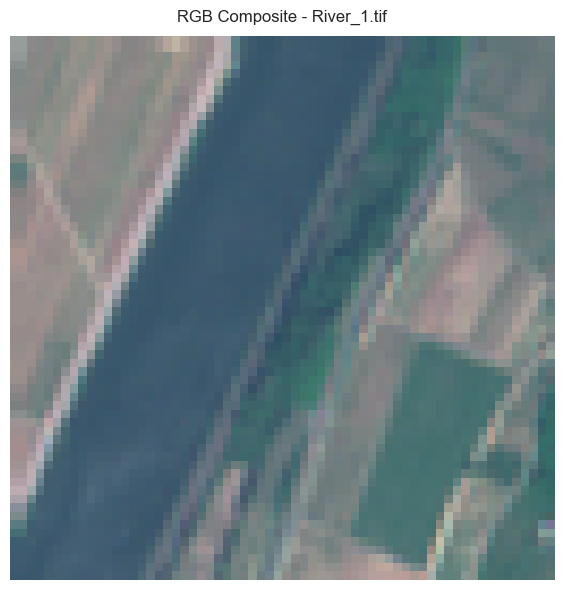

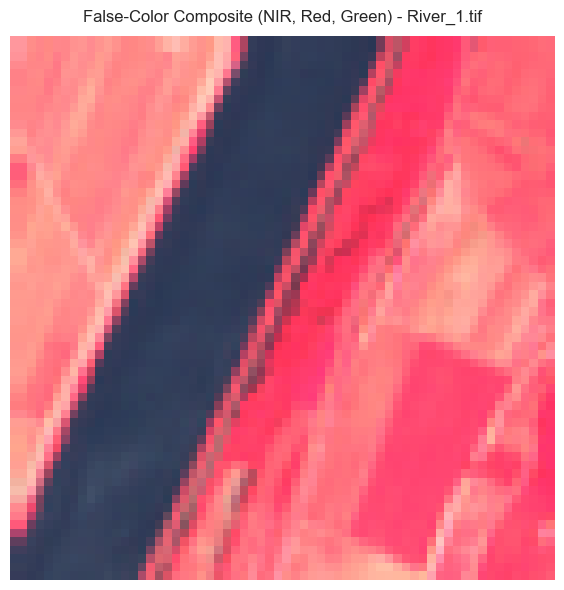


Sample Image Band Statistics:


,Band,Mean,Std,Min,Max
0,B01,1189.976318,55.999496,1101.000000,1319.000000
1,B02,969.998047,127.756176,762.000000,1483.000000
2,B03,919.375732,183.016172,609.000000,1515.000000
3,B04,776.124023,297.594848,364.000000,1603.000000
4,B05,1080.721436,405.317390,402.000000,1658.000000
5,B06,1811.565186,832.062917,399.000000,3357.000000
6,B07,2069.493896,998.408194,411.000000,4081.000000
7,B08,2024.364258,1057.722894,330.000000,4241.000000
8,B09,826.197266,368.654696,162.000000,1450.000000
9,B10,11.968018,1.423232,8.000000,15.000000



🏥 Water Body Quality Assessment (based on NDWI):
--------------------------------------------------
💦 Very High Water Content (NDWI > 0.6): 0.0%
💧 High Water Content (0.3–0.6):         5.2%
🌿 Moderate Moisture (0.1–0.3):          18.5%
🌱 Low Moisture (-0.1–0.1):          1.1%
🏜️ Non-Water (< -0.1):               75.1%

🎯 Overall Water Quality Score: 0.137 → Poor 🏜️
✅ Deep multispectral analysis completed!


C:\Users\tadoa\AppData\Local\Temp\ipykernel_400\1598075214.py:110: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


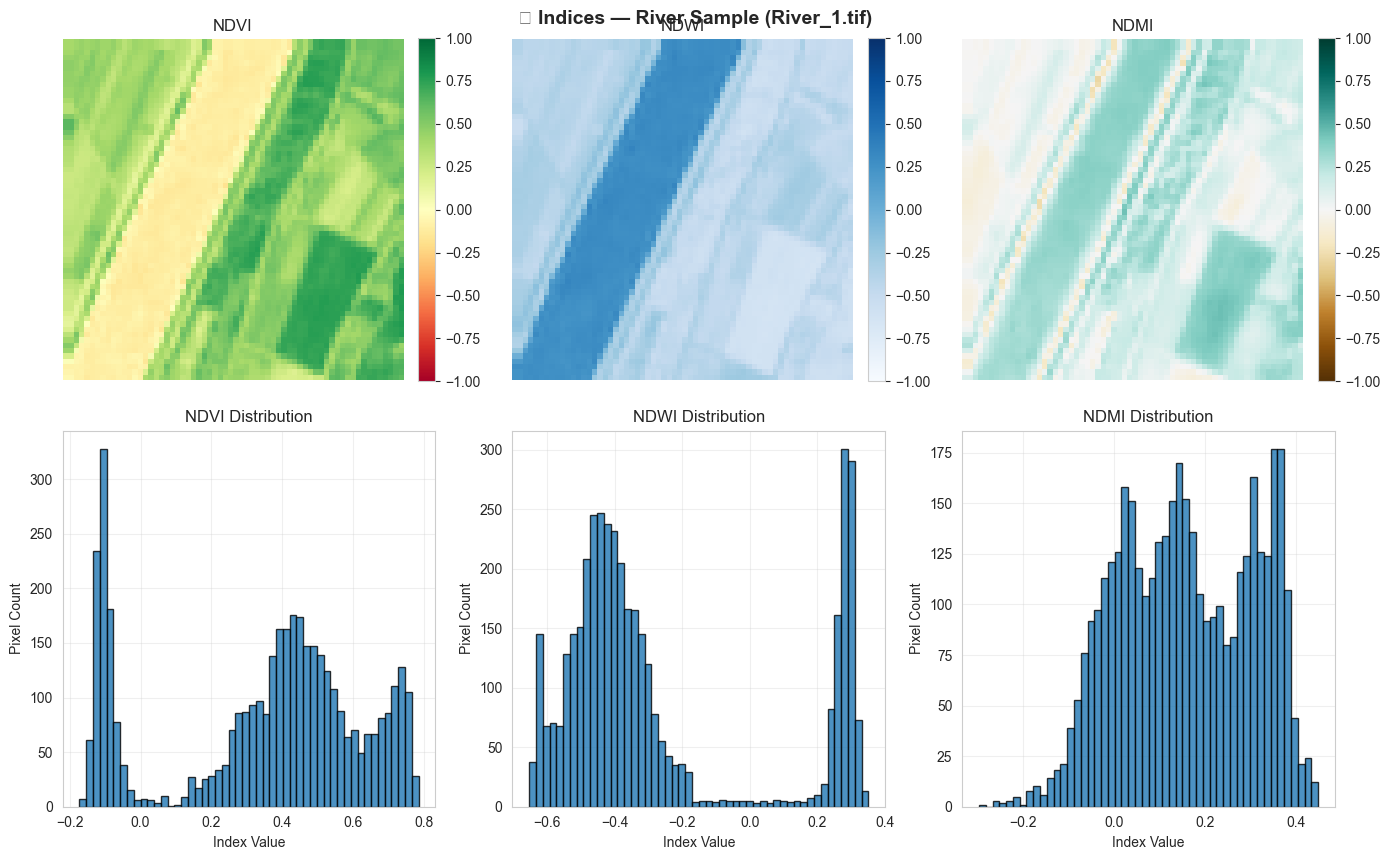

In [8]:
import rasterio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set seaborn style for better visuals
sns.set_style("whitegrid")

print("Exploring Sample River Image...")
print("=" * 55)

# Load sample image
river_files = sorted((DATA_DIR / CLASS_NAME).glob("*.tif"))
if not river_files:
    raise FileNotFoundError("No river images found!")
sample_file = river_files[0]
print(f"Sample image: {sample_file.name}")

try:
    with rasterio.open(sample_file) as src:
        img = src.read()  # Shape: (bands, height, width)
        profile = src.profile
except Exception as e:
    raise RuntimeError(f"Failed to open {sample_file.name}: {e}")

# Display RGB composite (bands 4, 3, 2)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # B04 (Red), B03 (Green), B02 (Blue)
rgb = np.clip(rgb / 2000, 0, 1)  # Normalize for display
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"RGB Composite - {sample_file.name}", fontsize=12, pad=10)
plt.axis('off')
plt.tight_layout()
plt.show()

# Display False-color composite (bands 8, 4, 3)
false_color = np.stack([img[7], img[3], img[2]], axis=-1)  # B08 (NIR), B04 (Red), B03 (Green)
false_color = np.clip(false_color / 2000, 0, 1)
plt.figure(figsize=(6, 6))
plt.imshow(false_color)
plt.title(f"False-Color Composite (NIR, Red, Green) - {sample_file.name}", fontsize=12, pad=10)
plt.axis('off')
plt.tight_layout()
plt.show()

# Compute basic statistics
stats = []
for b in range(img.shape[0]):
    band = img[b].astype(float)
    stats.append({
        'Band': f'B{b+1:02d}',
        'Mean': np.mean(band),
        'Std': np.std(band),
        'Min': np.min(band),
        'Max': np.max(band)
    })
stats_df = pd.DataFrame(stats)
print("\nSample Image Band Statistics:")
display(stats_df.style.set_caption("Band Statistics for Sample Image").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '14px'), ('font-weight', 'bold')]}
]))

# --- Compute vegetation indices ---
with rasterio.open(sample_file) as src:
    nir = src.read(8).astype(np.float32)
    red = src.read(4).astype(np.float32)
    green = src.read(3).astype(np.float32)
    swir1 = src.read(11).astype(np.float32)

# Vegetation (NDVI)
ndvi = (nir - red) / (nir + red + 1e-6)

# Water Index (NDWI)
ndwi = (green - nir) / (green + nir + 1e-6)

# Normalized Difference Moisture Index (NDMI)
ndmi = (nir - swir1) / (nir + swir1 + 1e-6)

# --- Assess 'health' based on NDWI (primarily for demonstration on water bodies) ---
very_healthy = np.sum(ndwi > 0.6) / ndwi.size * 100
healthy = np.sum((ndwi > 0.3) & (ndwi <= 0.6)) / ndwi.size * 100
moderate = np.sum((ndwi > 0.1) & (ndwi <= 0.3)) / ndwi.size * 100
sparse = np.sum((ndwi > -0.1) & (ndwi <= 0.1)) / ndwi.size * 100
non_water = np.sum(ndwi <= -0.1) / ndwi.size * 100

print("\n🏥 Water Body Quality Assessment (based on NDWI):")
print("-" * 50)
print(f"💦 Very High Water Content (NDWI > 0.6): {very_healthy:.1f}%")
print(f"💧 High Water Content (0.3–0.6):         {healthy:.1f}%")
print(f"🌿 Moderate Moisture (0.1–0.3):          {moderate:.1f}%")
print(f"🌱 Low Moisture (-0.1–0.1):          {sparse:.1f}%")
print(f"🏜️ Non-Water (< -0.1):               {non_water:.1f}%")

score = (very_healthy*1.0 + healthy*0.8 + moderate*0.5 + sparse*0.2)/100
status = "Excellent 💦✨" if score>0.8 else ("Good 💧" if score>0.6 else ("Moderate 🌿" if score>0.4 else "Poor 🏜️"))
print(f"\n🎯 Overall Water Quality Score: {score:.3f} → {status}")
print("✅ Deep multispectral analysis completed!")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(14, 9))
im1 = axes[0,0].imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1); axes[0,0].set_title('NDVI'); axes[0,0].axis('off'); plt.colorbar(im1, ax=axes[0,0], fraction=0.046, pad=0.04)
im2 = axes[0,1].imshow(ndwi, cmap='Blues', vmin=-1, vmax=1); axes[0,1].set_title('NDWI'); axes[0,1].axis('off'); plt.colorbar(im2, ax=axes[0,1], fraction=0.046, pad=0.04)
im3 = axes[0,2].imshow(ndmi, cmap='BrBG', vmin=-1, vmax=1); axes[0,2].set_title('NDMI'); axes[0,2].axis('off'); plt.colorbar(im3, ax=axes[0,2], fraction=0.046, pad=0.04)

for i, (arr, title) in enumerate(zip([ndvi, ndwi, ndmi], ['NDVI Distribution','NDWI Distribution','NDMI Distribution'])):
    axes[1,i].hist(arr.ravel(), bins=50, alpha=0.8, edgecolor='black')
    axes[1,i].set_title(title); axes[1,i].set_xlabel('Index Value'); axes[1,i].set_ylabel('Pixel Count'); axes[1,i].grid(True, alpha=0.3)

plt.suptitle(f"🌊 Indices — River Sample ({sample_file.name})", fontsize=14, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()


## 📊 Step 5: Large-Scale River Spectral Statistics

📊 Starting Large-Scale River Spectral Analysis...
📁 Analyzing 1,000 River images out of 2,000 available
⚡ Using 4 threads for parallel processing
📏 Image dimensions: 64 × 64 pixels
📊 Spectral bands: 13


Processing images:   0%|          | 0/1000 [00:00<?, ?it/s]

Completed in 17.4 seconds | Success: 1000 | Errors: 0

First 5 rows of processed data:


,filename,band_1_mean,band_1_std,band_1_min,band_1_max,band_1_median,band_1_p05,band_1_p95,band_1_nonzero_pct,band_2_mean,...,band_12_nonzero_pct,band_13_mean,band_13_std,band_13_min,band_13_max,band_13_median,band_13_p05,band_13_p95,band_13_nonzero_pct,ndwi_mean
0,River_1.tif,1189.976318,55.999496,1101.0,1319.0,1181.0,1115.0,1280.00,100.0,969.998047,...,100.0,2219.889648,1118.774170,352.0,4392.0,2647.0,384.00,3832.25,100.0,-0.256150
1,River_100.tif,1928.057617,10.388879,1905.0,1964.0,1928.0,1913.0,1946.25,100.0,1453.288818,...,100.0,1561.846924,668.860596,424.0,4265.0,1546.5,492.50,2789.25,100.0,-0.083812
2,River_1001.tif,1266.317871,109.668800,1031.0,1578.0,1321.0,1053.0,1358.00,100.0,1126.687012,...,100.0,1410.502686,1339.769775,254.0,4063.0,385.0,264.00,3748.25,100.0,0.149917
3,River_1000.tif,1162.867676,11.562714,1135.0,1188.0,1162.0,1144.0,1182.00,100.0,820.912598,...,100.0,2067.176758,413.370056,459.0,3038.0,2129.0,1248.75,2641.25,100.0,-0.440483
4,River_1004.tif,1213.613770,44.309978,1083.0,1286.0,1228.0,1107.0,1259.00,100.0,975.572754,...,100.0,1482.736328,1443.307007,207.0,5414.0,699.0,218.00,4300.25,100.0,0.075122



Band Statistics Summary:


,band,name,wavelength,resolution,mean_of_means,std_of_means,p05_mean,p95_mean,mean_of_stds,mean_p05,mean_p95,avg_nonzero_pct,n_images
0,B01,B01-Coastal,443nm,60,1305.736533,146.177298,1107.461914,1542.012463,69.737467,1220.72450,1433.94025,100.0,1000
1,B02,B02-Blue,490nm,10,1038.058648,137.394947,839.371960,1294.434705,149.896778,883.55275,1303.52475,100.0,1000
2,B03,B03-Green,560nm,10,926.372225,144.003834,716.608594,1193.197339,198.692290,689.18450,1265.14075,100.0,1000
3,B04,B04-Red,665nm,10,713.155454,202.973489,447.019775,1083.434680,279.174119,435.51350,1240.86700,100.0,1000
4,B05,B05-RedEdge1,705nm,20,928.797721,211.449773,616.750708,1272.621252,314.636110,489.68000,1439.28350,100.0,1000
5,B06,B06-RedEdge2,740nm,20,1711.567467,476.120615,1023.030981,2553.750696,782.036327,522.49800,2815.65750,100.0,1000
6,B07,B07-RedEdge3,783nm,20,2063.298299,636.788124,1158.865894,3228.603796,1003.506159,557.36250,3516.09275,100.0,1000
7,B08,B08-NIR,842nm,10,1981.710485,622.795846,1087.600366,3108.649133,1086.729977,427.76825,3586.21850,100.0,1000
8,B09,B09-WaterVapor,945nm,60,592.664687,255.296251,271.054968,1114.479272,238.893089,225.94450,933.66525,100.0,1000
9,B10,B10-Cirrus,1375nm,60,10.402981,3.230029,7.292676,15.793152,1.472816,8.14025,12.76400,100.0,1000


C:\Users\tadoa\AppData\Local\Temp\ipykernel_400\2866357792.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='band', y='mean_of_means', palette='Blues_d')


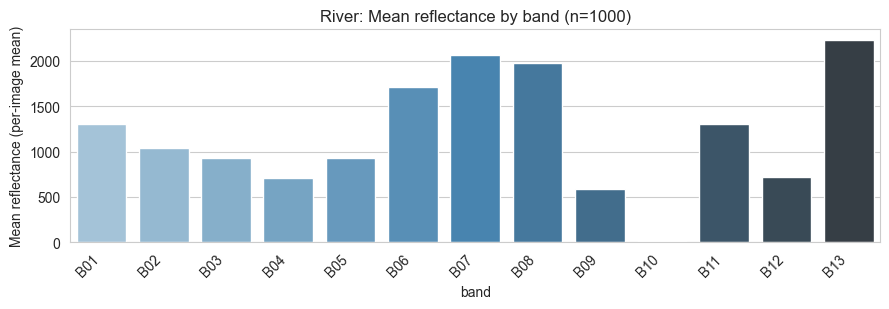

C:\Users\tadoa\AppData\Local\Temp\ipykernel_400\2866357792.py:147: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'B{b:02d}' for b in range(1, band_count+1)], rotation=45, ha='right')


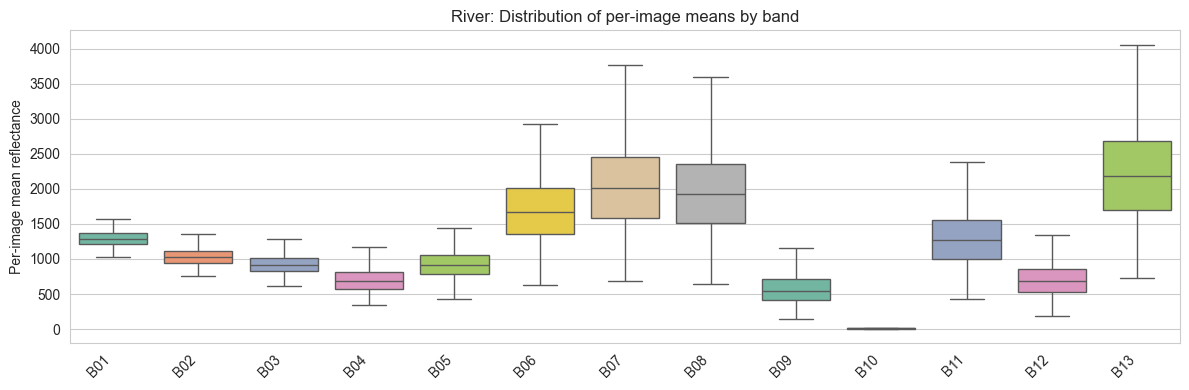

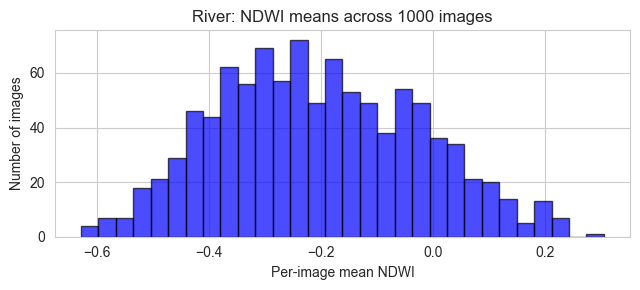


🔎 Takeaways:
- Highest River reflectance bands: B13(B8A-NIRNarrow), B07(B07-RedEdge3), B08(B08-NIR), B06(B06-RedEdge2), B01(B01-Coastal)
- Lowest reflectance (often atmospheric/less useful): B10(B10-Cirrus), B09(B09-WaterVapor), B04(B04-Red)
✅ Step 5 done.


In [10]:
# ====== STEP 5: Large-Scale River Spectral Statistics (with NDWI) ======
import time
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from concurrent.futures import ThreadPoolExecutor, as_completed
import warnings
import pandas as pd
from tqdm.auto import tqdm # <-- FIX: Import tqdm for progress bars

warnings.filterwarnings('ignore', category=rasterio.errors.NotGeoreferencedWarning)

CLASS_NAME = "River"
print(f"📊 Starting Large-Scale {CLASS_NAME} Spectral Analysis...")
print("=" * 65)

river_dir = DATA_DIR / CLASS_NAME
files = sorted(river_dir.glob("*.tif"))
assert len(files) > 0, f"No .tif files found in {river_dir}"

MAX_SAMPLES = min(1000, len(files))
N_THREADS = 4
selected_files = files[:MAX_SAMPLES]

print(f"📁 Analyzing {len(selected_files):,} {CLASS_NAME} images out of {len(files):,} available")
print(f"⚡ Using {N_THREADS} threads for parallel processing")

with rasterio.open(selected_files[0]) as src0:
    band_count = src0.count
    sample_height, sample_width = src0.height, src0.width
print(f"📏 Image dimensions: {sample_height} × {sample_width} pixels")
print(f"📊 Spectral bands: {band_count}")

SENTINEL2_BANDS = {
     1: {'name': 'B01-Coastal', 'wavelength': '443nm', 'resolution': 60},
     2: {'name': 'B02-Blue', 'wavelength': '490nm', 'resolution': 10},
     3: {'name': 'B03-Green', 'wavelength': '560nm', 'resolution': 10},
     4: {'name': 'B04-Red', 'wavelength': '665nm', 'resolution': 10},
     5: {'name': 'B05-RedEdge1', 'wavelength': '705nm', 'resolution': 20},
     6: {'name': 'B06-RedEdge2', 'wavelength': '740nm', 'resolution': 20},
     7: {'name': 'B07-RedEdge3', 'wavelength': '783nm', 'resolution': 20},
     8: {'name': 'B08-NIR', 'wavelength': '842nm', 'resolution': 10},
     9: {'name': 'B09-WaterVapor', 'wavelength': '945nm', 'resolution': 60},
    10: {'name': 'B10-Cirrus', 'wavelength': '1375nm', 'resolution': 60},
    11: {'name': 'B11-SWIR1', 'wavelength': '1610nm', 'resolution': 20},
    12: {'name': 'B12-SWIR2', 'wavelength': '2190nm', 'resolution': 20},
    13: {'name': 'B8A-NIRNarrow', 'wavelength': '865nm', 'resolution': 20},
}

def per_band_stats(arr: np.ndarray):
    """Compute statistics for a single band."""
    x = arr.astype(np.float32)
    valid = x[x > 0]
    if valid.size == 0:
        return {'mean': np.nan, 'std': np.nan, 'min': np.nan, 'max': np.nan,
                'median': np.nan, 'p05': np.nan, 'p95': np.nan, 'nonzero_pct': 0.0}
    return {
        'mean': float(valid.mean()), 'std': float(valid.std()), 'min': float(valid.min()), 'max': float(valid.max()),
        'median': float(np.median(valid)), 'p05': float(np.nanpercentile(valid, 5)), 'p95': float(np.nanpercentile(valid, 95)),
        'nonzero_pct': float(100 * valid.size / x.size)
    }

def process_image(filepath: Path) -> tuple:
    """Process a single image and compute band stats and indices."""
    try:
        with rasterio.open(filepath) as src:
            if src.count != band_count:
                return None, f"Band mismatch in {filepath.name}: expected {band_count}, got {src.count}"
            stats = {'filename': filepath.name}
            cache = {}
            for b in range(1, band_count+1):
                arr = src.read(b)
                cache[b] = arr
                band_stats = per_band_stats(arr)
                for k, v in band_stats.items():
                    stats[f'band_{b}_{k}'] = v

            # Compute NDWI = (Green - NIR) / (Green + NIR)
            green = cache[3].astype(np.float32)
            nir   = cache[8].astype(np.float32)
            ndwi = (green - nir) / (green + nir + 1e-6)
            ndwi = np.clip(ndwi, -1, 1)
            stats['ndwi_mean'] = float(np.nanmean(ndwi))

            return stats, None
    except Exception as e:
        return None, f"Error processing {filepath.name}: {e}"

results, errors = [], []
start_time = time.time()
with ThreadPoolExecutor(max_workers=N_THREADS) as executor:
    futures = [executor.submit(process_image, fp) for fp in selected_files]
    for future in tqdm(as_completed(futures), total=len(futures), desc="Processing images"):
        res, err = future.result()
        if res is not None:
            results.append(res)
        if err is not None:
            errors.append(err)
print(f"Completed in {time.time()-start_time:.1f} seconds | Success: {len(results)} | Errors: {len(errors)}")
if errors:
    print("\nFirst 3 errors (if any):")
    print("\n".join(errors[:3]))

df = pd.DataFrame(results)
if df.empty:
    raise ValueError("No images processed—cannot summarize.")
print("\nFirst 5 rows of processed data:")
display(df.head())

summary_rows = []
for b in range(1, band_count+1):
    m  = df[f'band_{b}_mean'].to_numpy(dtype=float)
    sd = df[f'band_{b}_std'].to_numpy(dtype=float)
    p5 = df[f'band_{b}_p05'].to_numpy(dtype=float)
    p95= df[f'band_{b}_p95'].to_numpy(dtype=float)
    nz = df[f'band_{b}_nonzero_pct'].to_numpy(dtype=float)
    summary_rows.append({
        'band': f'B{b:02d}',
        'name': SENTINEL2_DETAILED.get(b, {}).get('name', f'B{b:02d}'),
        'wavelength': SENTINEL2_DETAILED.get(b, {}).get('wavelength', 'N/A'),
        'resolution': SENTINEL2_DETAILED.get(b, {}).get('resolution', 'N/A'),
        'mean_of_means': float(np.nanmean(m)),
        'std_of_means': float(np.nanstd(m)),
        'p05_mean': float(np.nanpercentile(m, 5)),
        'p95_mean': float(np.nanpercentile(m, 95)),
        'mean_of_stds': float(np.nanmean(sd)),
        'mean_p05': float(np.nanmean(p5)),
        'mean_p95': float(np.nanmean(p95)),
        'avg_nonzero_pct': float(np.nanmean(nz)),
        'n_images': int(len(df))
    })
summary = pd.DataFrame(summary_rows)
print("\nBand Statistics Summary:")
display(summary)

plt.figure(figsize=(9, 3.2))
sns.barplot(data=summary, x='band', y='mean_of_means', palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean reflectance (per-image mean)')
plt.title(f"{CLASS_NAME}: Mean reflectance by band (n={len(df)})")
plt.tight_layout()
plt.show()

data_for_box = [df[f'band_{b}_mean'].to_numpy(dtype=float) for b in range(1, band_count+1)]
plt.figure(figsize=(12, 4))
sns.boxplot(data=data_for_box, palette='Set2', showfliers=False)
plt.gca().set_xticklabels([f'B{b:02d}' for b in range(1, band_count+1)], rotation=45, ha='right')
plt.ylabel('Per-image mean reflectance')
plt.title(f"{CLASS_NAME}: Distribution of per-image means by band")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6.5, 3))
plt.hist(df['ndwi_mean'].to_numpy(dtype=float), bins=30, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel('Per-image mean NDWI'); plt.ylabel('Number of images')
plt.title(f"{CLASS_NAME}: NDWI means across {len(df)} images")
plt.tight_layout()
plt.show()

top_bands = summary.sort_values('mean_of_means', ascending=False).head(5)[['band','name']]
low_bands = summary.sort_values('mean_of_means', ascending=True).head(3)[['band','name']]
print("\n🔎 Takeaways:")
print("- Highest River reflectance bands:", ", ".join([f"{b}({n})" for b,n in top_bands.to_numpy()]))
print("- Lowest reflectance (often atmospheric/less useful):", ", ".join([f"{b}({n})" for b,n in low_bands.to_numpy()]))
print("✅ Step 5 done.")
